In [ ]:
Performing EDA(exploratory data analysis) and machine learning models :- Logistic Rression, Decision Tree , Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,cholesterol,diabetes,ejection_fraction,high_blood_pressure,platelets,serum1,serum_sodium,sex,smoking,time,DEATH
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.columns.values

array(['age', 'anaemia', 'cholesterol ', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum1', 'serum_sodium',
       'sex', 'smoking', 'time', 'DEATH'], dtype=object)

In [4]:
df.isnull().sum()

age                    0
anaemia                0
cholesterol            0
diabetes               0
ejection_fraction      0
high_blood_pressure    0
platelets              0
serum1                 0
serum_sodium           0
sex                    0
smoking                0
time                   0
DEATH                  0
dtype: int64

In [5]:
df.describe()

,age,anaemia,cholesterol,diabetes,ejection_fraction,high_blood_pressure,platelets,serum1,serum_sodium,sex,smoking,time,DEATH
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Data Visualization

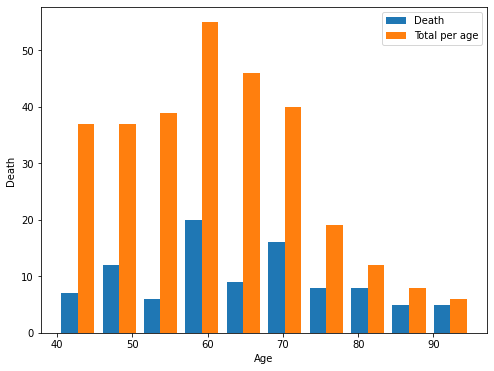

In [6]:
age_yes = df[df['DEATH'] == 1].age
age = df.age
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Death ')
plt.hist([age_yes, age], label=['Death', 'Total per age'])
plt.legend()

Text(0.5, 1.0, 'Men and women survival rates')

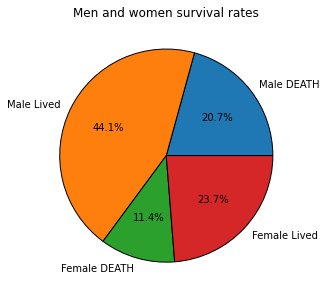

In [7]:
#Percentages of Male and Female who lived and died from heart failure

male = df[df.sex ==1]
female = df[df.sex == 0 ]

male_lived = male[male.DEATH ==0]
male_died = male [male.DEATH ==1]
female_lived = female[female.DEATH ==0]
female_died =  female[female.DEATH ==1]
data = [len(male_died), len(male_lived),len(female_died),len(female_lived)]
plt.pie(x=data,labels=['Male DEATH','Male Lived', 'Female DEATH','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Men and women survival rates')

Text(0.5, 1.0, 'Anaemia survival rates')

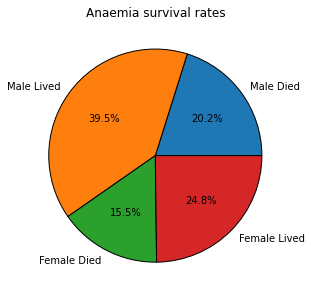

In [8]:
#Percentages of Male and Female who lived and died from heart failure with having anemia

male_died_anemia = male_died[male_died.anaemia==1]
male_lived_anemia = male_lived[male_lived.anaemia==1]
female_died_anemia = female_died[female_died.anaemia==1]
female_lived_anemia = female_lived[female_lived.anaemia==1]
data = [len(male_died_anemia), len(male_lived_anemia),len(female_died_anemia),len(female_lived_anemia)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Anaemia survival rates')

Text(0.5, 1.0, 'Non-Anaemia survival rates')

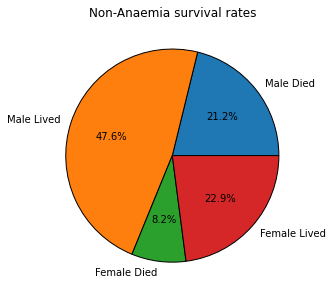

In [9]:
#zPercentages of Male and Female who lived and died from heart failure with having non-anemia

male_died_anemia = male_died[male_died.anaemia==0]
male_lived_anemia = male_lived[male_lived.anaemia==0]
female_died_anemia = female_died[female_died.anaemia==0]
female_lived_anemia = female_lived[female_lived.anaemia==0]
data = [len(male_died_anemia), len(male_lived_anemia),len(female_died_anemia),len(female_lived_anemia)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Non-Anaemia survival rates')

Text(0.5, 1.0, 'Diabetes survival rates')

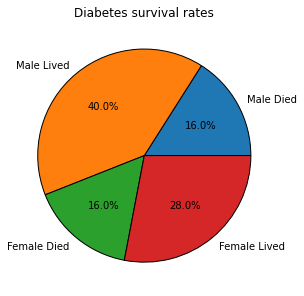

In [10]:
#Percentages of Male and Female who lived and died from heart failure with having diabetes

male_died_diabetes = male_died[male_died.diabetes==1]
male_lived_diabetes = male_lived[male_lived.diabetes==1]
female_died_diabetes = female_died[female_died.diabetes==1]
female_lived_diabetes = female_lived[female_lived.diabetes==1]
data = [len(male_died_diabetes), len(male_lived_diabetes),len(female_died_diabetes),len(female_lived_diabetes)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Diabetes survival rates')

Text(0.5, 1.0, 'Non-Diabetes survival rates')

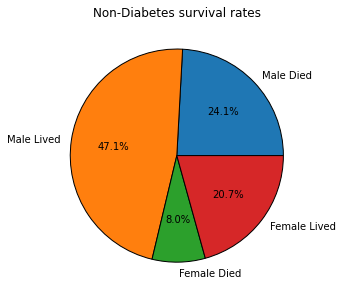

In [11]:
#Percentages of Male and Female who lived and died from heart failure with having non-diabetes

male_died_diabetes = male_died[male_died.diabetes==0]
male_lived_diabetes = male_lived[male_lived.diabetes==0]
female_died_diabetes = female_died[female_died.diabetes==0]
female_lived_diabetes = female_lived[female_lived.diabetes==0]
data = [len(male_died_diabetes), len(male_lived_diabetes),len(female_died_diabetes),len(female_lived_diabetes)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Non-Diabetes survival rates')

Text(0.5, 1.0, 'High Blood Pressure survival rates')

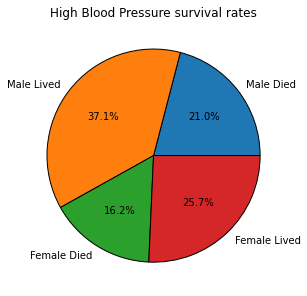

In [12]:
#Percentages of Male and Female who lived and died from heart failure with having  high blood pressure

male_died_hbp = male_died[male_died.high_blood_pressure==1]
male_lived_hbp= male_lived[male_lived.high_blood_pressure==1]
female_died_hbp = female_died[female_died.high_blood_pressure==1]
female_lived_hbp= female_lived[female_lived.high_blood_pressure==1]
data = [len(male_died_hbp), len(male_lived_hbp),len(female_died_hbp),len(female_lived_hbp)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('High Blood Pressure survival rates')

Text(0.5, 1.0, 'Non-High Blood Pressure survival rates')

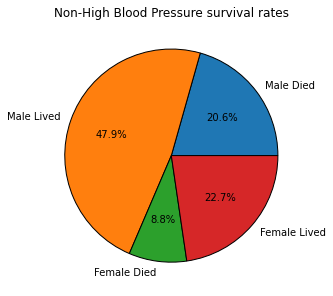

In [13]:
#Percentages of Male and Female who lived and died from heart failure with having Non-High Blood Pressure survival rates

male_died_hbp = male_died[male_died.high_blood_pressure==0]
male_lived_hbp= male_lived[male_lived.high_blood_pressure==0]
female_died_hbp = female_died[female_died.high_blood_pressure==0]
female_lived_hbp= female_lived[female_lived.high_blood_pressure==0]
data = [len(male_died_hbp), len(male_lived_hbp),len(female_died_hbp),len(female_lived_hbp)]
plt.pie(x=data,labels=['Male Died','Male Lived', 'Female Died','Female Lived'],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.tight_layout()
plt.title('Non-High Blood Pressure survival rates')

In [14]:
#create and train some machine learning models to  predict heart failure

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('DEATH', axis='columns')
y = df['DEATH']


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [17]:
print("X train")
print(X_train)
print("y train")
print(y_train)
print("X test")
print(X_test)
print("y test")
print(y_test)

X train
      age  anaemia  cholesterol   diabetes  ejection_fraction  \
154  65.0        1           335         0                 35   
97   70.0        1            59         0                 60   
274  60.0        1           257         1                 30   
201  45.0        0           308         1                 60   
132  46.0        0           719         0                 40   
..    ...      ...           ...       ...                ...   
66   42.0        1           250         1                 15   
53   70.0        1            69         1                 50   
79   55.0        0           336         0                 45   
280  70.0        0          2695         1                 40   
8    65.0        0           157         0                 65   

     high_blood_pressure  platelets  serum1  serum_sodium  sex  smoking  time  
154                    1  235000.00    0.80           136    0        0   120  
97                     0  255000.00    1.10        

In [18]:
#implementing models

In [19]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
df = LogisticRegression()
# fit the regressor with x and y data
df.fit(X_train,y_train)

y_pred = df.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of  LogisticRegression : ",accuracy)

Accuracy of  LogisticRegression :  0.8111111111111111


In [21]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier()
# fit the regressor with x and y data
df = df.fit(X_train,y_train)

y_pred = df.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of Decision tree : ",accuracy)

Accuracy of Decision tree :  0.7666666666666667


In [22]:
#randomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


df = RandomForestClassifier()
# fit the regressor with x and y data
df=df.fit(X_train,y_train) 

Y_pred = df.predict(X_test) 
accuracy_score(y_test,y_pred)
print("Accuracy of RandomForest:",accuracy)

Accuracy of RandomForest: 0.7666666666666667


Conclussion:- Based on the overall performance,LogisticRegression fits best, which gives a high accuracy around 81%